In [ ]:
!pip install insightface

In [ ]:
!pip install onnxruntime

In [5]:
from insightface.app import FaceAnalysis
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
model = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
model.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 68068.61KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


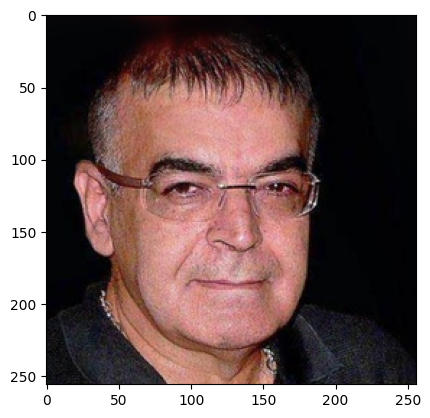

In [16]:
input_img = cv2.imread("drive/MyDrive/FaceBank/Hamid_Lolaei/219979_396-0.jpg")
input_img= cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
plt.imshow(input_img)

In [17]:
results = model.get(input_img)
face_bank = np.load("output/face_bank.npy", allow_pickle=True)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


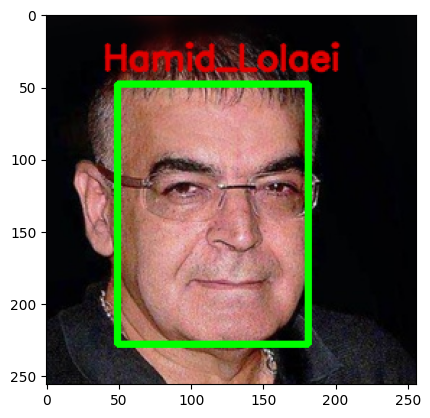

In [23]:
result_img = input_img.copy()
for result in results:
    bbox = result.bbox
    x, y, w, h =int(bbox[0]),int(bbox[1]),int(bbox[2]),int(bbox[3])
    cv2.rectangle(result_img,(x,y),(w,h),(0,255,0),4)
    for person in face_bank:
        new_person= result["embedding"]
        face_bank_person= person["embedding"]
        distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding)**2))
        if distance < 20:
            cv2.putText(result_img,person["name"],
                    (int(bbox[0])-10 , int(bbox[1]) -10),
                    cv2.FONT_ITALIC,0.8,(225,0,0),2,cv2.LINE_AA)
            break
        else:
            cv2.putText(result_img, "UnKnown",
                    (int(bbox[0])-10 , int(bbox[1]) -10),
                    cv2.FONT_ITALIC,0.8,(225,0,0),2,cv2.LINE_AA)

plt.imshow(result_img)



In [26]:
result_img=cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("output/output.jpg",result_img)

True